# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [9]:
N = 13 # put your index here

In [10]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print (u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [11]:
def eucleadian_dist(X, Y):
    if len(X.shape) == 1:
        X = X.reshape(1, np.shape(X)[0])
    if len(Y.shape) == 1:
        Y = Y.reshape(1, np.shape(Y)[0])
    x_dist = (X ** 2).sum(axis=1)
    y_dist = (Y ** 2).sum(axis=1)
    xy_dist = X.dot(Y.T)
    dist = np.abs(- 2 * xy_dist + y_dist + x_dist.reshape(-1, 1))
    return np.sqrt(dist)

In [12]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k=3, linkage='single', **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        if linkage != 'single' and linkage != 'complete' and linkage != 'average' or k < 1:
            raise ValueError("Wrong metric or k!")
        self.linkage = linkage
        self.labels = np.empty(0, dtype=int)
        self.x_len = 0
        return

    def single_(self, a, b):
        return np.min(eucleadian_dist(a, b))

    def complete_(self, a, b):
        return np.max(eucleadian_dist(a, b))

    def average_(self, a, b):
        a_len = len(a)
        b_len = len(b)
        return (np.sum(eucleadian_dist(a, b)) / (a_len * b_len))
    
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        # Аггломеративный алгоритм
        # начинаем с ситуации, когда каждый объект - отдельный кластер
        self.x_len = len(x)
        if self.x_len < self.k:
            raise ValueError('Wrong k value')
        self.labels = np.linspace(0, self.x_len - 1, num = self.x_len, dtype = int)
        
        if self.linkage == 'single':
            metric = self.single_
        elif self.linkage == 'complete':
            metric = self.complete_
        else:
            metric = self.average_
            
        base_labels = np.linspace(0, self.x_len - 1, num = self.x_len, dtype = int)
        
        # пока не получаем требуемое количество кластеров
        while self.x_len > self.k:
            step = 0
            cluster_a = -1 # кластер, в который будут слиты данные
            cluster_b = -1 # кластер, который исчезнет в результате слияния
            min_dist = float('inf')  # расстояние между кандидатами A и B на слияние
            
            for label_a in base_labels[:]:  # вычислили и запомнили номера наиболее близких кластеров
                step = step + 1
                candidate_a = x[(self.labels == label_a)]
                for label_b in base_labels[step:]:
                    candidate_b = x[(self.labels == label_b)]
                    dist = metric(candidate_a, candidate_b) 
                    if dist < min_dist: 
                        min_dist = dist
                        cluster_a = label_a      
                        cluster_b = label_b
            
            self.labels[(self.labels == cluster_b)] = cluster_a
            base_labels = base_labels[(base_labels != cluster_b)]
            self.x_len = self.x_len - 1

        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

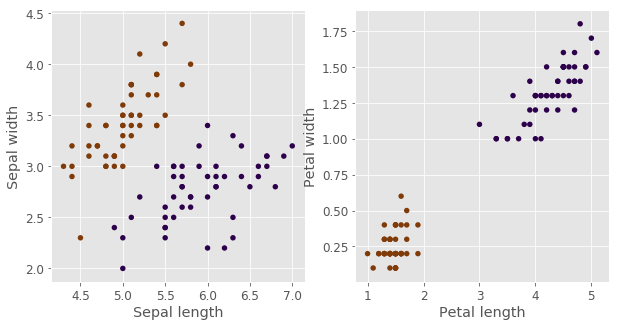

In [13]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))
matplotlib.rcParams.update({'font.size': 12})

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [14]:
pred_iris = Clustering(k=2, linkage='single').fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [15]:
pred_iris = Clustering(k=2, linkage='complete').fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [16]:
pred_iris = Clustering(k=2, linkage='average').fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


### Время работы

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
%%timeit
Clustering(k=2, linkage='average').fit_predict(x_iris)

6.4 s ± 58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
pred_iris = AgglomerativeClustering(n_clusters=20, linkage='average').fit_predict(x_iris)

799 µs ± 74.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Критерий качества

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

Будем использовать Silhouette. Для лучшего разбиения Silhouette максимален.

In [20]:
## Задание 2
def quality(x, y):
    """
    Sihouette
    """
    k = np.unique(y)
    n = np.shape(x)[0]
    s = np.empty(n) # silhoutee[i]
    
    # находим silhoutee[i]
    for i in range(n):
        #  a(i) is the average distance between i and all other data within the same cluster
        other_Ci = k[(k != y[i])]
        Ci = x[(y == y[i])]
        if len(Ci) == 1:
            s[i] = 0
            continue
        else:
            a = np.sum(eucleadian_dist(x[i], Ci)) / (np.shape(Ci)[0] - 1)
        
        # b(i) is the lowest average distance of x(i) to all points in any other cluster, of which x(i)  is not a member.
        b = float('inf')
        for j, k_class in np.ndenumerate(other_Ci):
            Ck = x[(y == k_class)]
            b = min(np.mean(eucleadian_dist(x[i], Ck)), b)
        s[i] = (b - a) / max(a, b)
    return np.mean(s)

Проверка

In [21]:
pred_iris = AgglomerativeClustering(n_clusters=20, linkage='average').fit_predict(x_iris)

In [22]:
quality(x_iris, pred_iris)

0.27594714793948166

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(x_iris, pred_iris)

0.27594715304325107

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

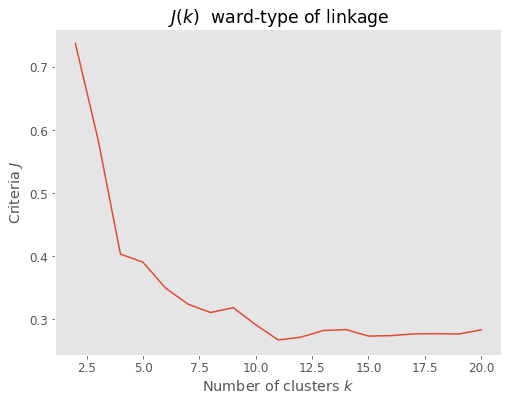

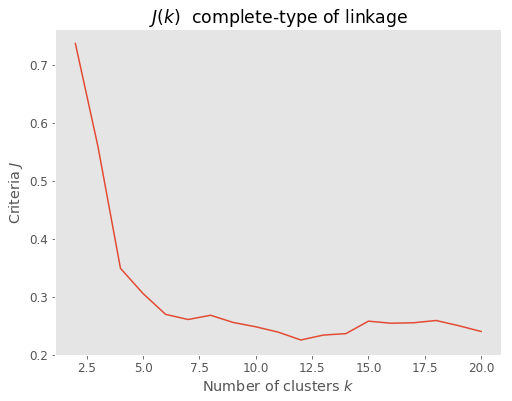

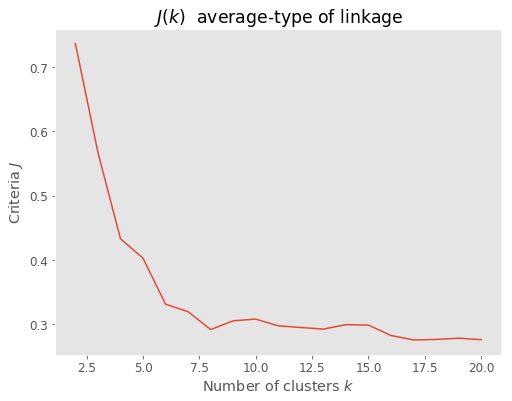

In [24]:
ks = range(2, 21)
linkages = ['ward', 'complete', 'average']
criteria = np.zeros((len(linkages), len(ks)))

for j, linkage in enumerate(linkages):
    for i, k in enumerate(ks):
        y = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit_predict(x_iris)
        criteria[j][i] = quality(x_iris, y)
    
    pl.figure(figsize=(8, 6))
    pl.plot(ks, criteria[j])
    pl.title("$J(k)$  " + linkages[j] + "-type of linkage")
    pl.ylabel("Criteria $J$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

## Задание 3

In [25]:
df = pd.read_csv('WDI_csv/WDIData.csv')

In [26]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [27]:
df_2014 = df[['Country Name', 'Indicator Name', '2014']]
df_2014 = df_2014.set_index(['Country Name', 'Indicator Name'])
df_2014 = df_2014.unstack()

df_2014 = (df_2014 - df_2014.mean()) / df_2014.std()
df_2014 = df_2014['2014']
df_2014 = df_2014.fillna(0)

df_2014  = df_2014[df_2014.columns[(df_2014 ** 2).sum() > 210]]
df_2014.head()

Indicator Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income (current US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),Adjusted savings: energy depletion (% of GNI),...,"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),Urban population growth (annual %),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.963057,0.271165,0.360824,0.454903,-0.322300,-0.695345,0.034647,0.076411,-0.536256,-0.467498,...,0.013301,-0.302612,-1.382433,1.570012,0.969008,1.232404,1.077107,-0.923939,-1.150670,-1.020328
Albania,0.287142,0.655037,0.720829,0.534540,-0.323156,-0.468420,-0.066614,-0.461724,-0.452076,-0.032576,...,1.768192,-0.317359,-0.082868,-0.245723,0.634111,0.805712,0.731026,-0.592768,-0.771125,-0.689038
Algeria,0.806903,0.627046,0.674489,0.508634,-0.302580,-0.441590,0.694829,-1.003016,0.061748,1.778672,...,0.659951,-0.262847,0.508961,0.484259,-0.515656,-0.374350,-0.414587,0.533392,0.414109,0.422717
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.084210,0.000000,...,0.000000,-0.320701,1.248101,-1.100239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.994474,0.655037,0.720829,0.534540,0.000000,0.000000,0.000000,0.000000,-0.778330,0.000000,...,0.000000,-0.320660,1.177746,-2.683953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


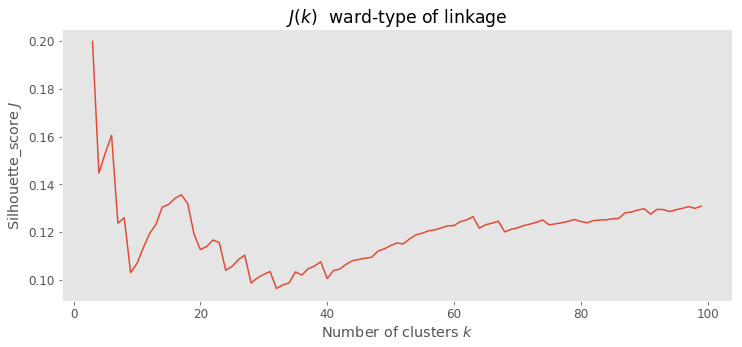

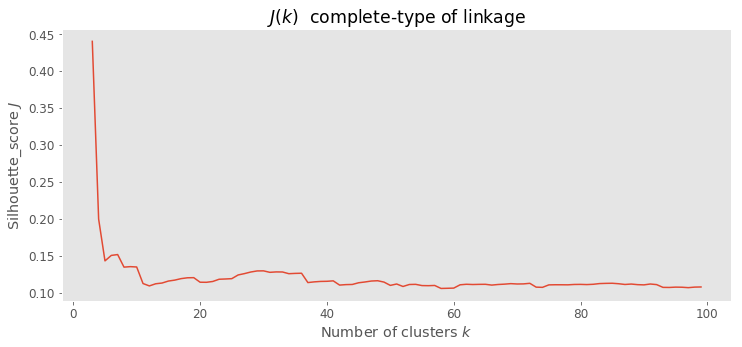

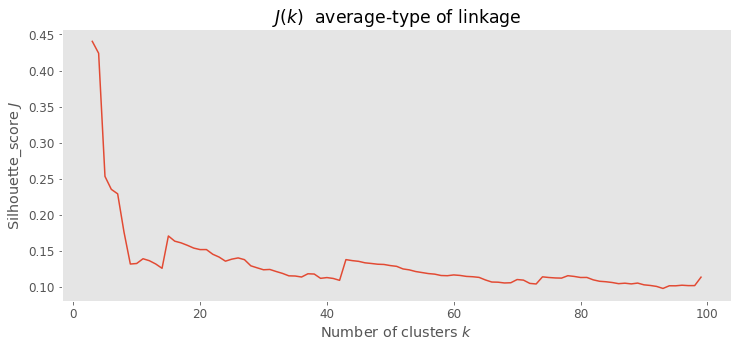

In [28]:
ks = range(3, 100)
linkages = ['ward', 'complete', 'average']
criteria = np.zeros((len(linkages), len(ks)))

for j, linkage in enumerate(linkages):
    for i, k in enumerate(ks):
        y = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit_predict(df_2014.values)
        criteria[j][i] = silhouette_score(df_2014.values, y)
    
    pl.figure(figsize=(12, 5))
    pl.plot(ks, criteria[j])
    pl.title("$J(k)$  " + linkages[j] + "-type of linkage")
    pl.ylabel("Silhouette_score $J$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

In [29]:
from sklearn.metrics import calinski_harabaz_score

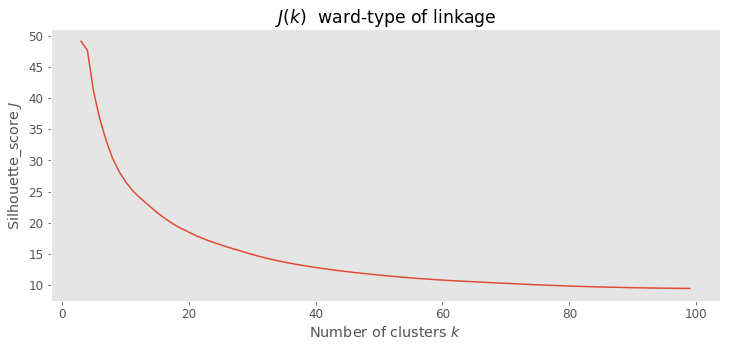

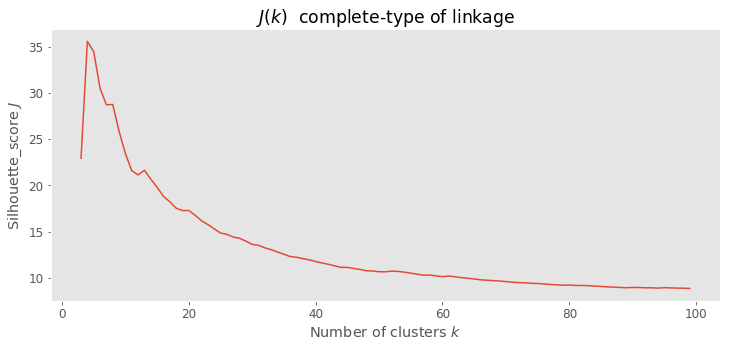

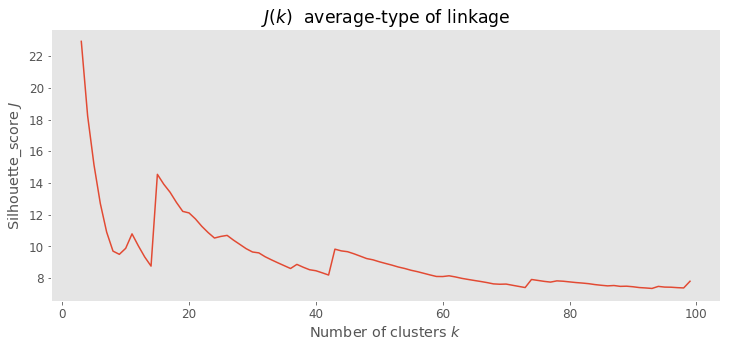

In [30]:
ks = range(3, 100)
linkages = ['ward', 'complete', 'average']
criteria = np.zeros((len(linkages), len(ks)))

for j, linkage in enumerate(linkages):
    for i, k in enumerate(ks):
        y = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit_predict(df_2014.values)
        criteria[j][i] = calinski_harabaz_score(df_2014.values, y)
    
    pl.figure(figsize=(12, 5))
    pl.plot(ks, criteria[j])
    pl.title("$J(k)$  " + linkages[j] + "-type of linkage")
    pl.ylabel("Silhouette_score $J$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

In [33]:
labels_2014 = Clustering(n_clusters=21, linkage='average').fit_predict(df_2014.values)

In [36]:
label_dictionary = {}
for i, label in enumerate(set(labels_2014)):
    label_dictionary.update({label : i + 1})
for i in range(labels_2014.shape[0]):
    labels_2014[i] = label_dictionary[labels_2014[i]]

In [37]:
df_2014.loc[:, 'label'] = labels_2014

for label, group in df_2014.groupby('label'):
    print('Cluster #{}'.format(label))    
    print(group.index.tolist())

Cluster #1
['Luxembourg', 'Malta']
Cluster #2
['Bahrain', 'Brunei Darussalam', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']
Cluster #3
['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Cabo Verde', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central Europe and the Baltics', 'Channel Islands', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Gibraltar', 'Greece', 'Gr

In [38]:
from sklearn.manifold import TSNE
transform = TSNE(n_components=2)
embedded = transform.fit_transform(df_2014.values)

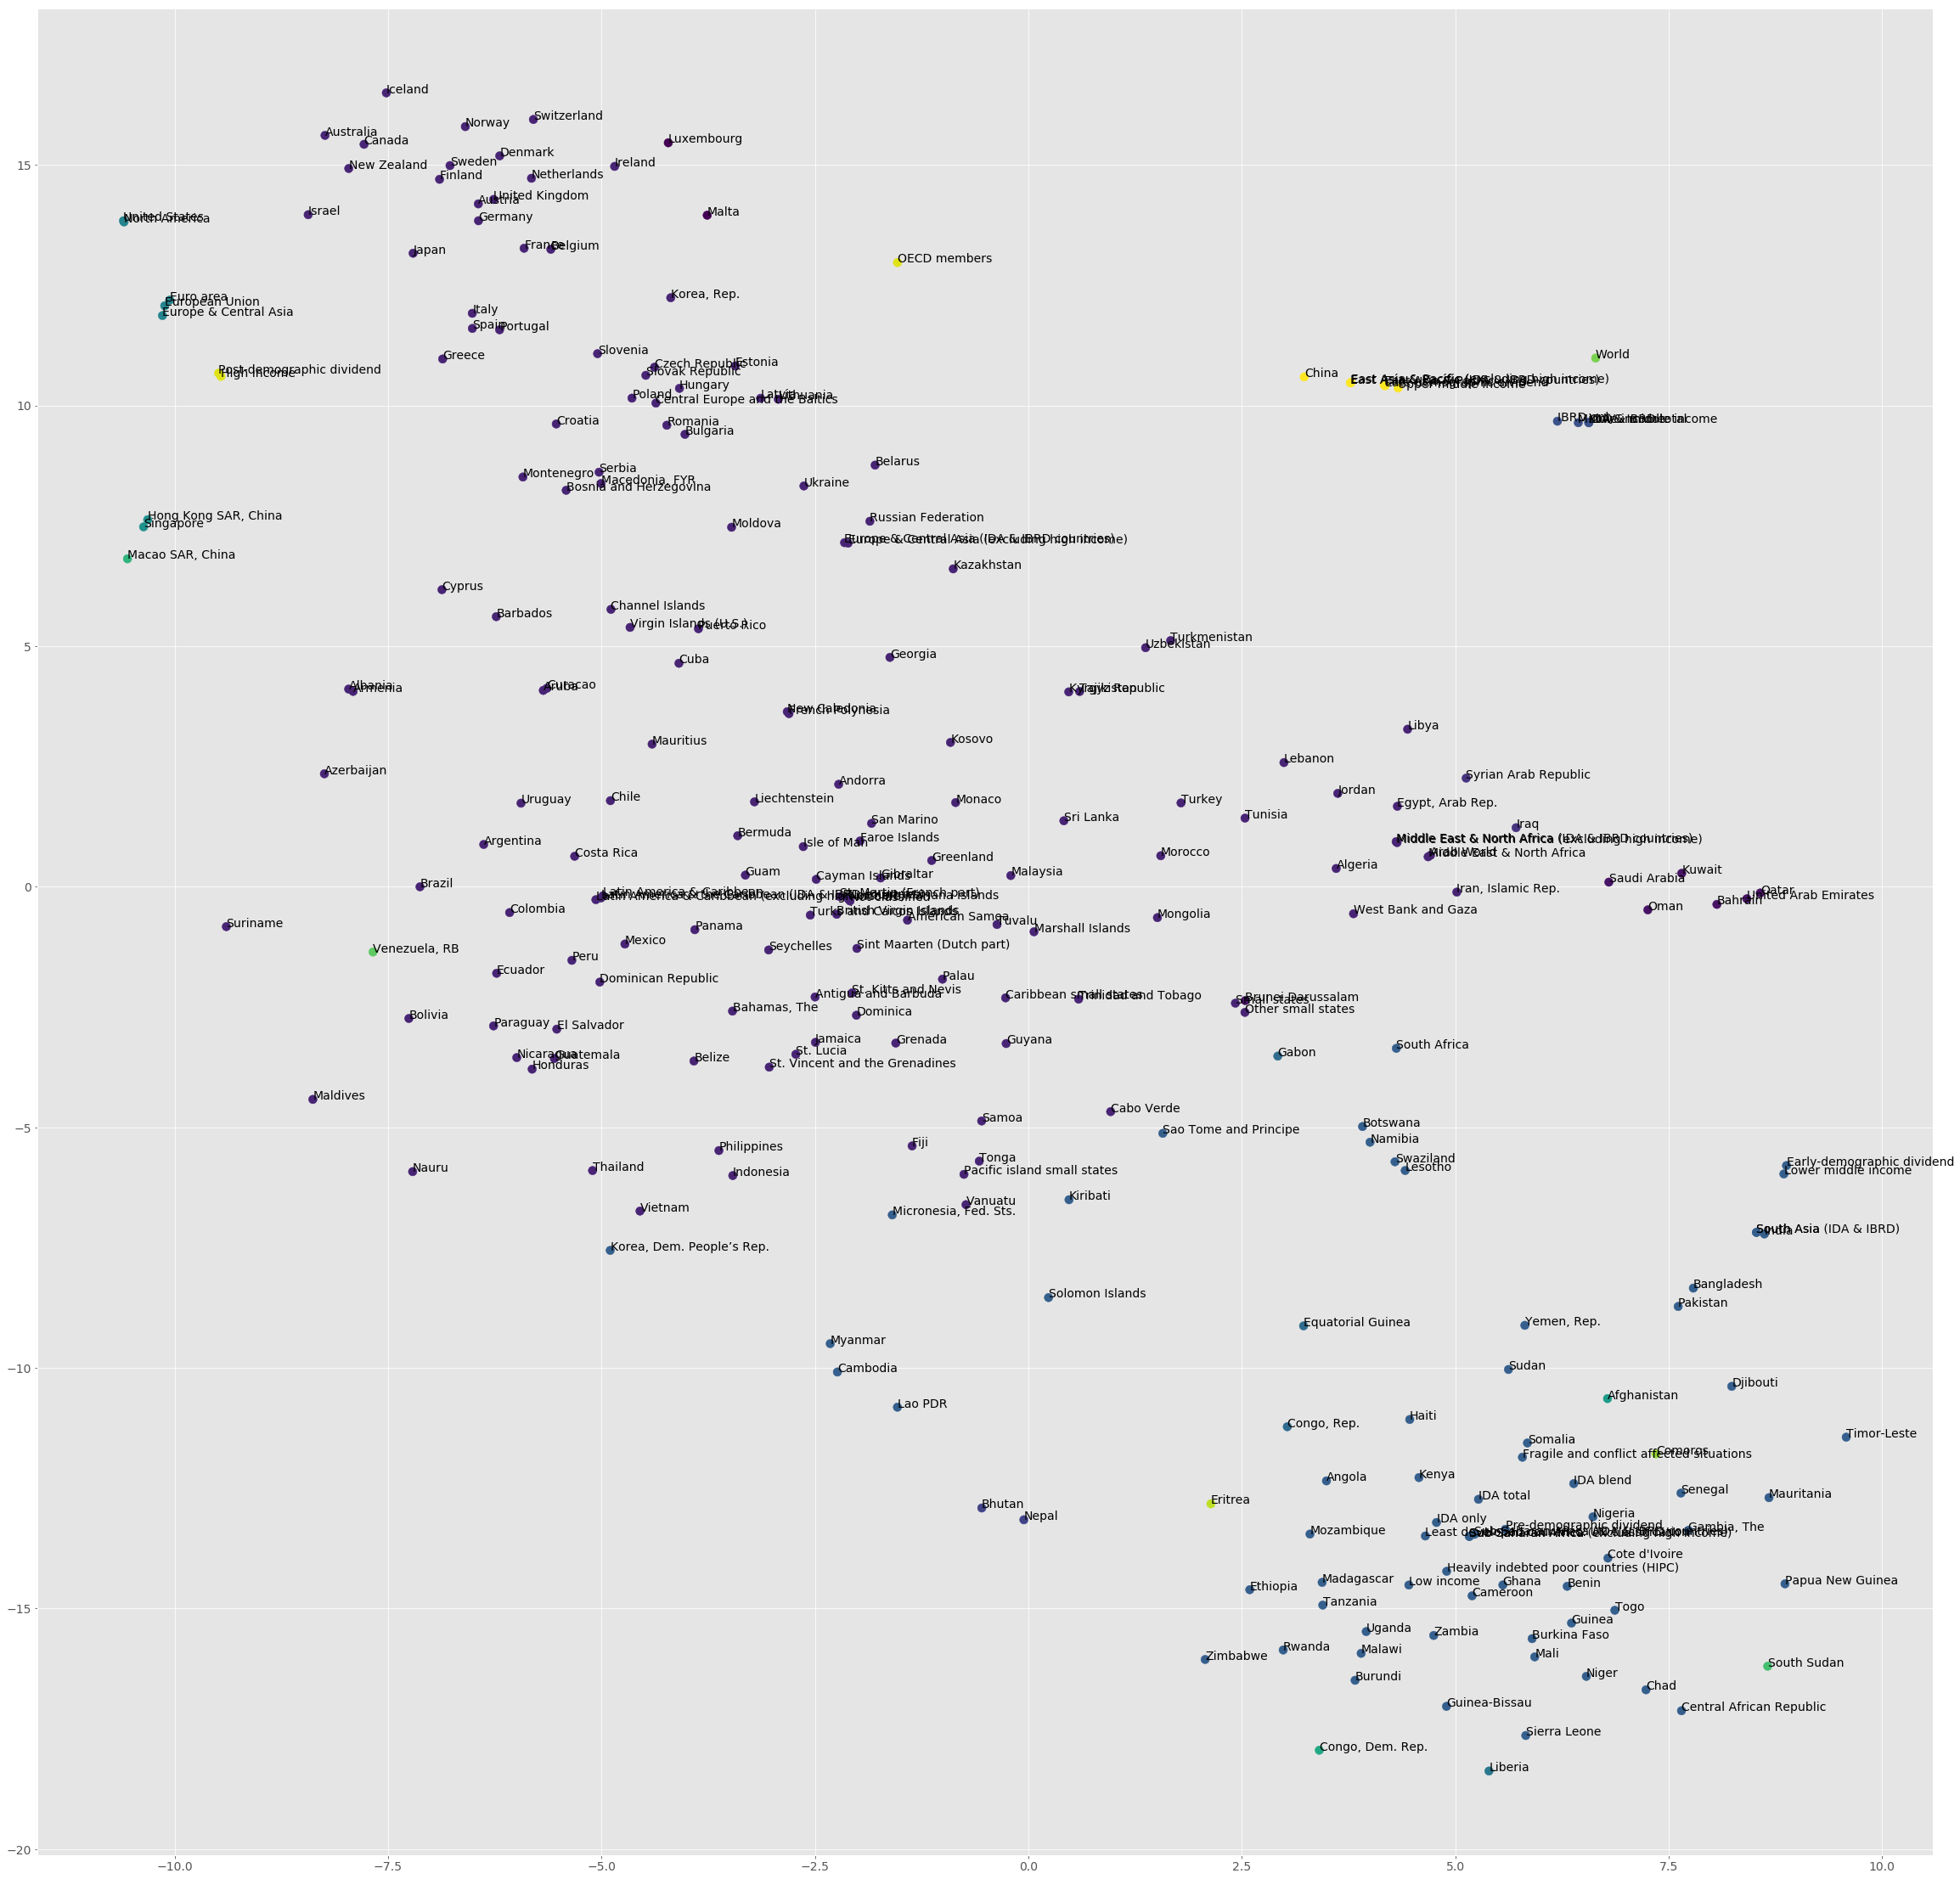

In [39]:
plt.figure(figsize=(40,40))
matplotlib.rcParams.update({'font.size': 14})

plt.scatter(embedded[:,0], embedded[:,1], c=labels_2014,  s=100)
for i in range(df_2014.shape[0]):
    #print(df_2014.index[i])
    plt.annotate(str(df_2014.index[i]), xy = embedded[i])
plt.show()

## Задание 4

    Алгоритм выделил следующие основные кластеры:
    1. Самые маленькие страны по площади территории
    2. Страны Персидского залива
    3. Развитые страны
    4. Ирак и Сирия - страны, в которых происходят военные действия
    5. Бутан и Непал - тибетские страны
    7. Бедные и слаборазвитые страны (особенно стоит отметить страны Африки)
    8. Габон, Экваториальная Гвинея, Республика Конго - поставщики нефти, лесоматериалов, сахара, какао, кофе
    11. Сигапур и Гонгонг - страны со свободным рынком, в который не вмешивается государство; страны зависящие от импортных поставок
    
    Кластеры представляют страны с наиболее близкими типами экономик

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.